In [3]:
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans

In [126]:
# Read in breast cancer data set
df = pd.read_csv("C:/Users/celin/OneDrive/Education/USD-MS-ADS/ADS-502-Applied-Data-Mining/Final-Project/breast-cancer.csv")

In [ ]:
# Partition the data into a training and a test set
df_train, df_test = train_test_split(df, test_size = 0.33, random_state = 7)

In [128]:
df.shape

(569, 32)

In [130]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [132]:
# Rename feature names to remove spaces
df.columns = df.columns.str.replace(' ', '_')

In [134]:
# Drop the id column
df = df.drop(['id'], axis=1)

In [136]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [138]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [140]:
numeric_df = df.select_dtypes(include=['number'])

In [142]:
correlation_matrix = numeric_df.corr()
correlation_matrix

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave_points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


We observe the correlation scatterplots for the first 16 columns, named axes, and then the remaining columns, named axes2, to determine which variables exhibit multicollinearity. We want to see no correlation when selecting variables for our analysis. Variables that exhibit linear or other relationships will be discarded.

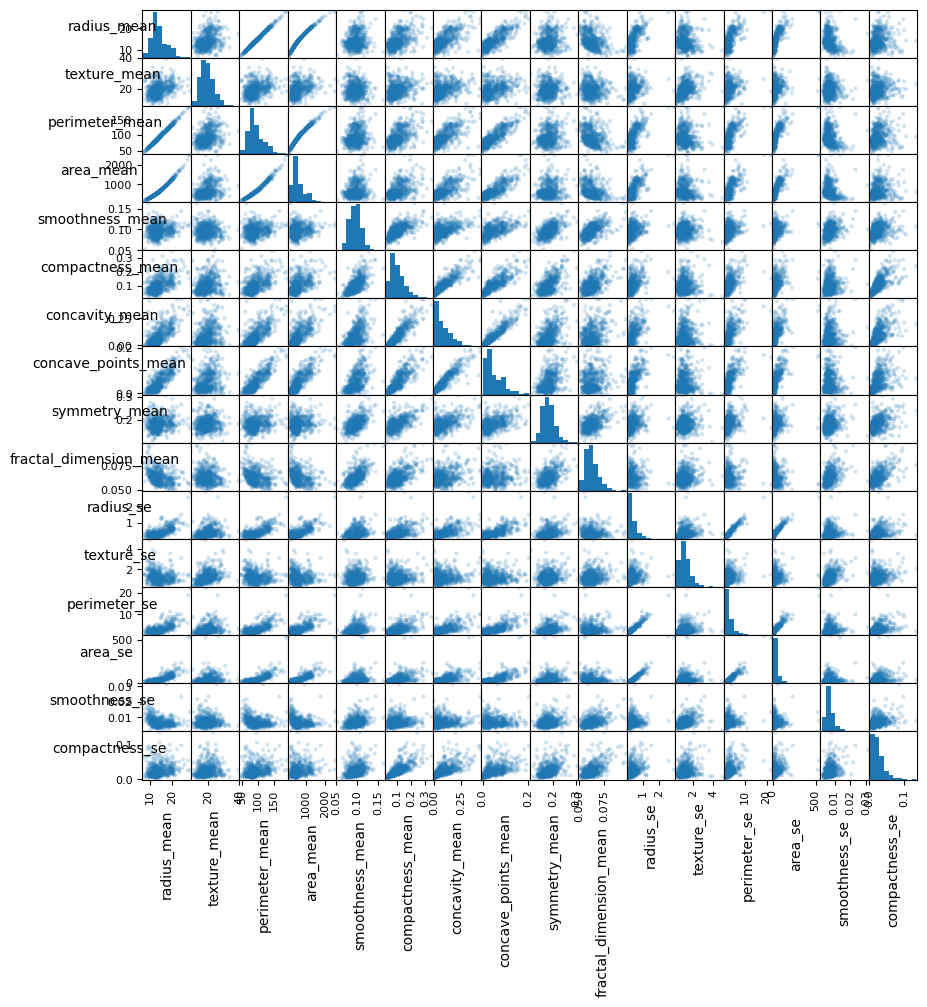

In [144]:
# Select only the first 16 columns
numeric_df_first_half = numeric_df.iloc[:, :16]

# Plotting the scatter matrix for the first 16 columns
axes = pd.plotting.scatter_matrix(numeric_df_first_half, alpha=0.2, figsize=(10, 10), diagonal='hist');

# Rotate the x-axis labels to be vertical and keep the y-axis labels horizontal
for ax in axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation=90)  # Set x-label to vertical
    ax.set_ylabel(ax.get_ylabel(), rotation=0)   # Keep y-label horizontal

# Optionally, you can adjust the size of the labels for better readability
for ax in axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=10)
    ax.set_ylabel(ax.get_ylabel(), fontsize=10)

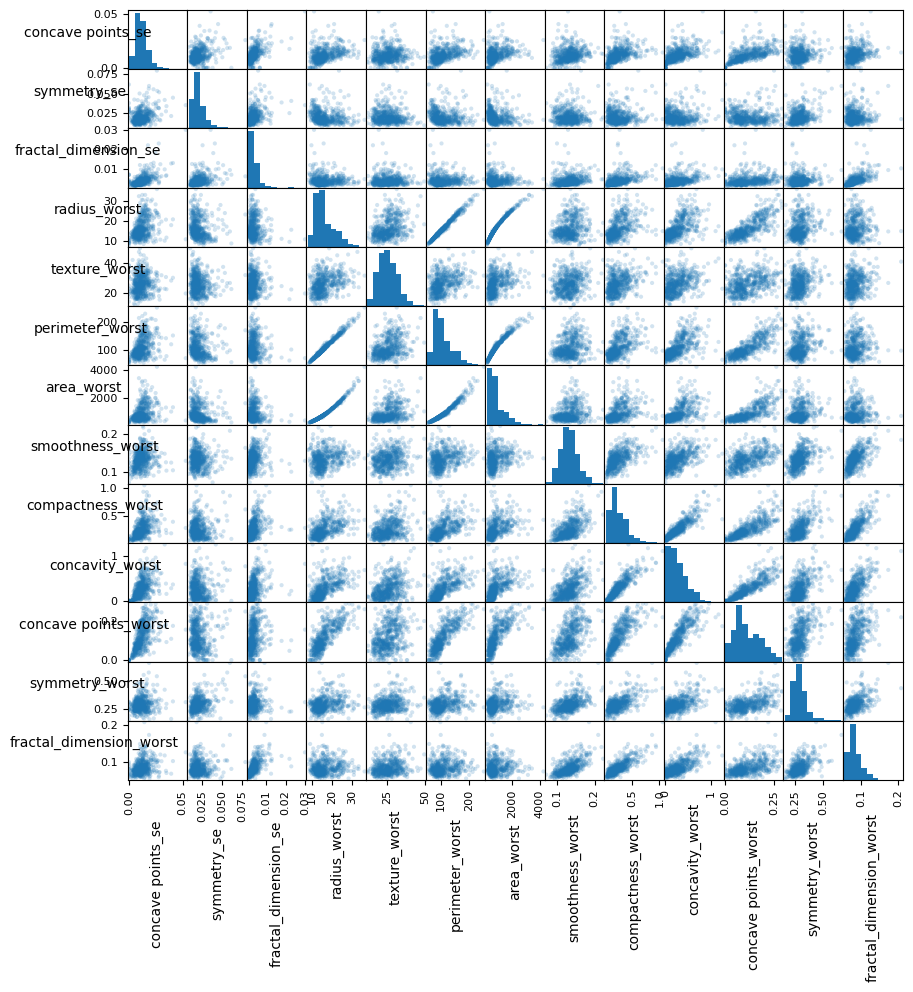

In [82]:
# Select the second half (columns 17 to 32) of the DataFrame
numeric_df_second_half = numeric_df.iloc[:, 17:31]

# Plotting the scatter matrix for the second half of the columns and suppressing the axes array output
axes2 = pd.plotting.scatter_matrix(numeric_df_second_half, alpha=0.2, figsize=(10, 10), diagonal='hist');

# Rotate the x-axis labels to be vertical and keep the y-axis labels horizontal
for ax in axes2.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation=90)  # Set x-label to vertical
    ax.set_ylabel(ax.get_ylabel(), rotation=0)   # Keep y-label horizontal

# Optionally, you can adjust the size of the labels for better readability
for ax in axes2.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=10)
    ax.set_ylabel(ax.get_ylabel(), fontsize=10)

In addition, three analyses will be performed to use the means only, then standard errors only, and lastly, worst only. For the first iteration, We will drop the means and standard error columns. An initial observation is that area_mean and perimeter_mean exhibit a linear relationship with radius_mean, naturally, since they are functions that use radius, so they will be dropped.

In [145]:
df_worst = df.drop(numeric_df.iloc[:, :20], axis=1)
df_worst

,diagnosis,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...
564,M,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Observing the correlation scatterplots, we see that area_worst has a much higher range than the other features. As a result, we will standardize this feature.

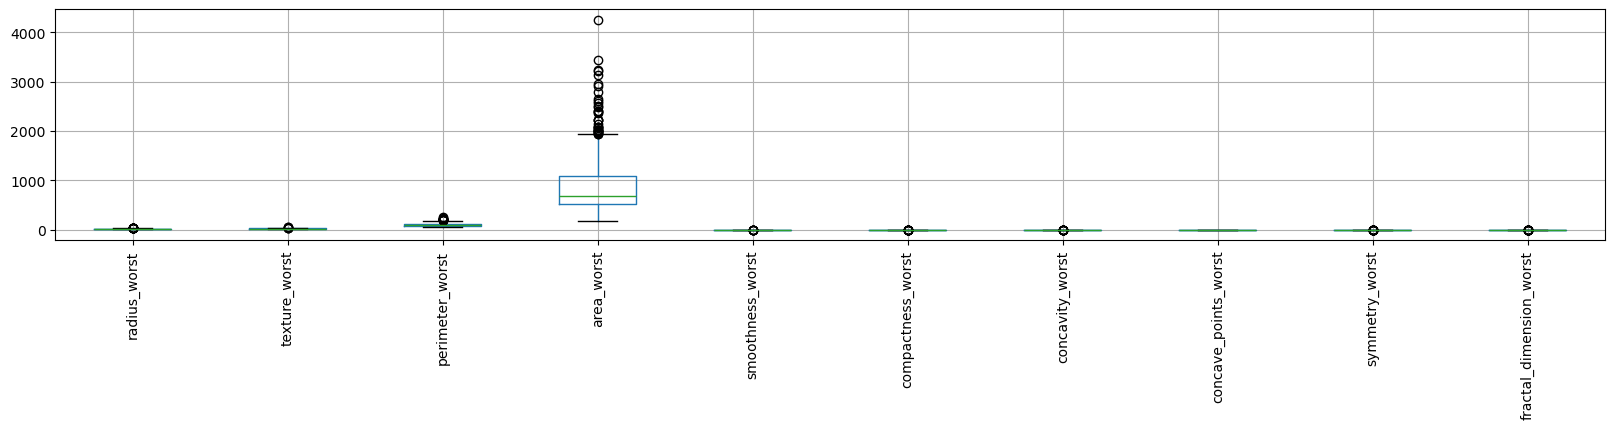

In [148]:
# Create boxplots of the features
bp = df_worst.boxplot(figsize=(20,3))

# Rotate the x-axis labels to be vertical
bp.set_xticklabels(bp.get_xticklabels(), rotation=90);

In [150]:
# Isolate the predictor variables in the data set
X = df_worst[['radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave_points_worst',
             'symmetry_worst','fractal_dimension_worst']]

# Standardize the predictor variables using the z-score transformation and save the result as a data frame
Xz = pd.DataFrame(stats.zscore(X), columns=['radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave_points_worst',
             'symmetry_worst','fractal_dimension_worst'])

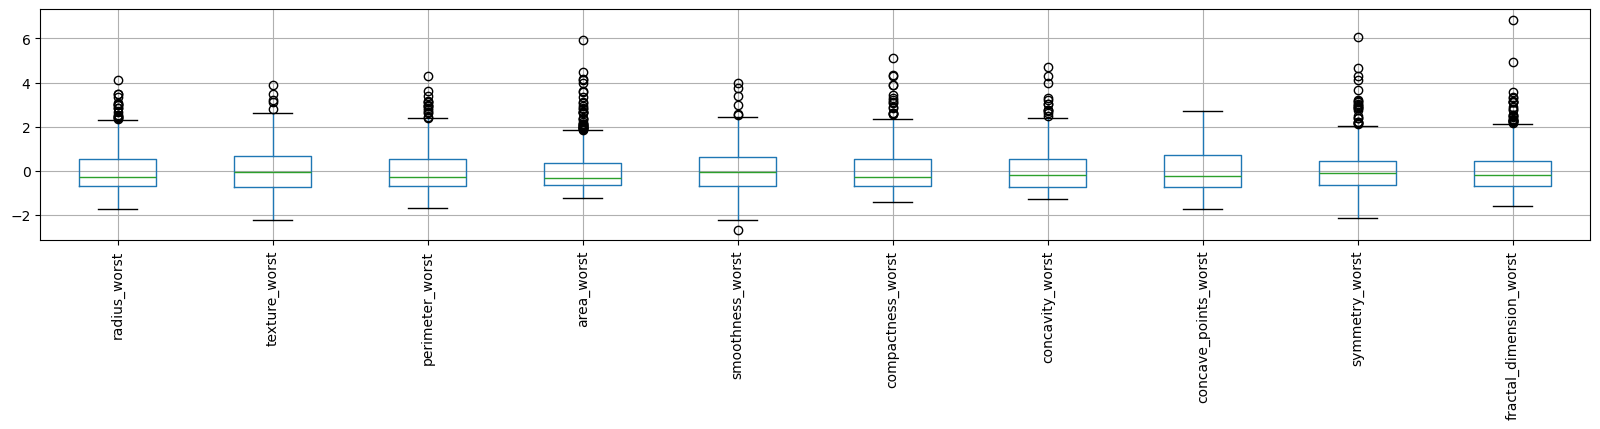

In [154]:
# Create new boxplots of the features
Xz_standard = Xz.boxplot(figsize=(20,3))

# Rotate the x-axis labels to be vertical
Xz_standard.set_xticklabels(bp.get_xticklabels(), rotation=90);

The scatterplots were recreated with the subset of "worst" data to analyze correlations between variables. Perimeter_worst, area_worst, and radius_worst are, naturally, correlated with each other. Since, according to Narasimha et al. (2013), "area, perimeter, diameter, concave points and compactness) of the nucleus" are relevant for predicting benignity or malignancy of tumors, the perimeter_worst and area_worst will be kept instead of the radius_worst feature. In addition, because concavity and concave_points exhibit heteroskedasticity (CFI Team, 2024), it is not advised to use K-means, and, instead, DBSCAN will be used (OpenAI, 2023).

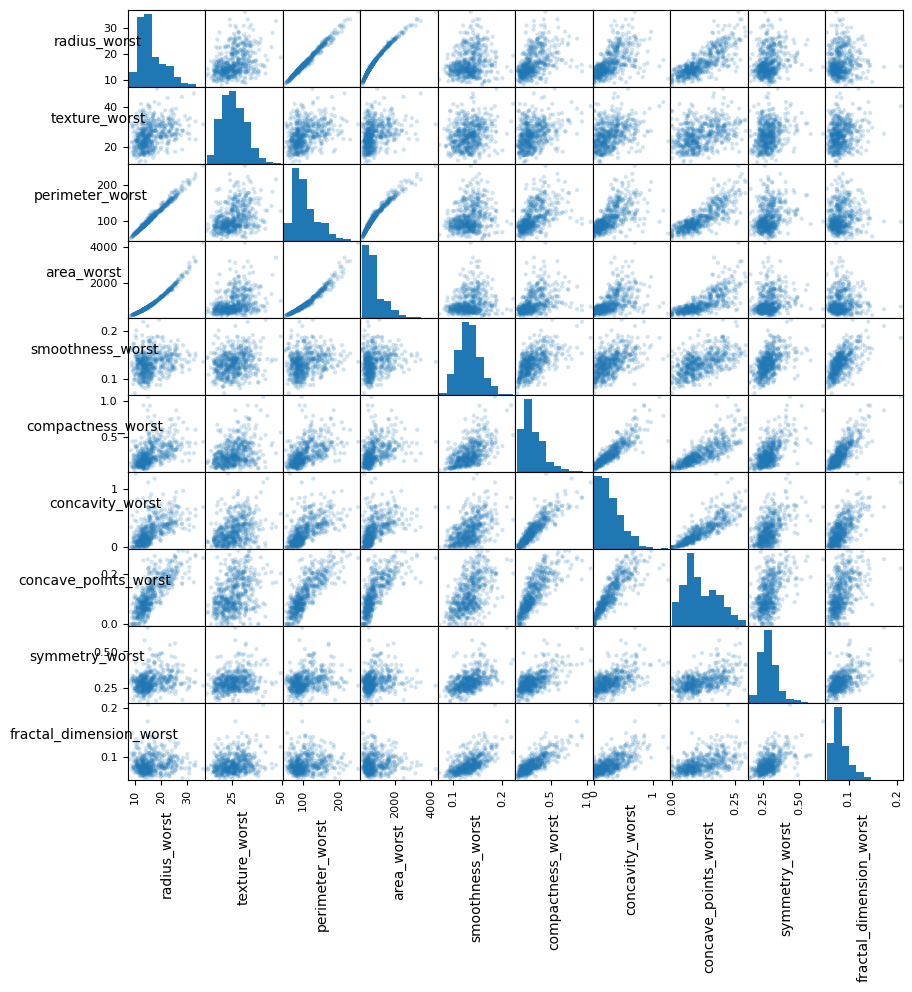

In [160]:
# Plotting the scatter matrix for the second half of the columns and suppressing the axes array output
axes3 = pd.plotting.scatter_matrix(df_worst, alpha=0.2, figsize=(10, 10), diagonal='hist');

# Rotate the x-axis labels to be vertical and keep the y-axis labels horizontal
for ax in axes3.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation=90)  # Set x-label to vertical
    ax.set_ylabel(ax.get_ylabel(), rotation=0)   # Keep y-label horizontal

# Optionally, you can adjust the size of the labels for better readability
for ax in axes3.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=10)
    ax.set_ylabel(ax.get_ylabel(), fontsize=10)

In [162]:
# Drop the radius_worst column
df_worst = df_worst.drop(['radius_worst'], axis=1)

# References
Narasimha, A., Vasavi, B., & Kumar, H. M. L. (2013). Significance of nuclear morphometry in benign and malignant breast aspirates. International Journal of Applied & Basic Medical Research, 14(4). https://doi.org/10.4103/2229-516X.112237 